# Plant Disease Expert


About Dataset

Plant disease is a deviation from the normal state of a plant that disrupts or alters its vital functions. Plant diseases can lead to significant yield losses, with estimated global potential losses of up to 16%. As a result, studying plant diseases and developing methods to diagnose and control them is an essential area of research in plant pathology.

The proper identification of plant diseases is crucial for effective control measures, as without them, control efforts can be ineffective and a waste of resources. Image processing algorithms have been developed to detect plant diseases by analyzing the color features of the infected leaves. One such algorithm involves using the K-means method for color segmentation and the Gray-Level Co-Occurrence Matrix (GLCM) for disease classification. This method of vision-based plant disease detection has shown promising results and has the potential to be an efficient and effective tool for disease diagnosis.

To understand the relationship between plant diseases and yield loss, it is necessary to consider the epidemiology of the disease, the physiology of the crop, the yield development, the damage mechanisms involved, and the effect of management practices. By integrating this information, it is possible to improve our understanding of the relationship between plant diseases and crop loss. However, it is important to note that yield loss studies are resource-intensive and can be difficult to interpret, as crops are rarely affected by only one pest or pathogen at a time.

In conclusion, the detection of plant diseases is an important aspect of agriculture, as it is essential for effective disease control and management. Image processing algorithms have shown promising results in the detecdetectingseases, and the integration of various aspects of plant physiology, disease epidemiology, and management practices can help increase our understanding of the relationship between plant diseases and crop loss. The goal of plant pathology research is to reduce yield losses and develop integrated pest management strategies based on economic thresholds, which can be achieved through a better understanding of the relationship between plant diseases and crop loss.


Link-https://www.kaggle.com/datasets/sadmansakibmahi/plant-disease-expert

## Importing the Pakages



In [1]:
pip install opencv-python


Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential


import cv2
#Open cv is part of opencv so we need to install the opencv pacakgae
import seaborn as sns
import matplotlib.pyplot as plt
import os


In [3]:
# Importing the Dataset



In [4]:
# here we are getting the dirname and corresponding file name as goind to make a dataset in which we can put these
algal = []
anthracnose = []


for dirname, _, filenames in os.walk(r"C:\Users\Acer pc\OneDrive - Manav Rachna Education Institutions\Desktop\dataset\archive\Image Data base\Image Data base\algal leaf in tea"):
    for filename in filenames:
        algal.append(os.path.join(dirname, filename))
    

for dirname, _, filenames in os.walk(r"C:\Users\Acer pc\OneDrive - Manav Rachna Education Institutions\Desktop\dataset\archive\Image Data base\Image Data base\anthracnose in tea"):
    for filename in filenames:
        anthracnose.append(os.path.join(dirname, filename))
        
# here we are getting the dirname and corresponding file name as goind to make a dataset in which we can put these

In [5]:
algal

['C:\\Users\\Acer pc\\OneDrive - Manav Rachna Education Institutions\\Desktop\\dataset\\archive\\Image Data base\\Image Data base\\algal leaf in tea\\algal_leaf_in_tea1.jpg',
 'C:\\Users\\Acer pc\\OneDrive - Manav Rachna Education Institutions\\Desktop\\dataset\\archive\\Image Data base\\Image Data base\\algal leaf in tea\\algal_leaf_in_tea10.jpg',
 'C:\\Users\\Acer pc\\OneDrive - Manav Rachna Education Institutions\\Desktop\\dataset\\archive\\Image Data base\\Image Data base\\algal leaf in tea\\algal_leaf_in_tea100.jpg',
 'C:\\Users\\Acer pc\\OneDrive - Manav Rachna Education Institutions\\Desktop\\dataset\\archive\\Image Data base\\Image Data base\\algal leaf in tea\\algal_leaf_in_tea101.jpg',
 'C:\\Users\\Acer pc\\OneDrive - Manav Rachna Education Institutions\\Desktop\\dataset\\archive\\Image Data base\\Image Data base\\algal leaf in tea\\algal_leaf_in_tea101.jpg_Flip_Horizontally_and_Vertically.jpg',
 'C:\\Users\\Acer pc\\OneDrive - Manav Rachna Education Institutions\\Desktop\\da

In [6]:
anthracnose

['C:\\Users\\Acer pc\\OneDrive - Manav Rachna Education Institutions\\Desktop\\dataset\\archive\\Image Data base\\Image Data base\\anthracnose in tea\\anthracnose_in_tea1.jpg',
 'C:\\Users\\Acer pc\\OneDrive - Manav Rachna Education Institutions\\Desktop\\dataset\\archive\\Image Data base\\Image Data base\\anthracnose in tea\\Anthracnose_in_tea1.jpg_Horizontally_flip.jpg',
 'C:\\Users\\Acer pc\\OneDrive - Manav Rachna Education Institutions\\Desktop\\dataset\\archive\\Image Data base\\Image Data base\\anthracnose in tea\\anthracnose_in_tea10.jpg',
 'C:\\Users\\Acer pc\\OneDrive - Manav Rachna Education Institutions\\Desktop\\dataset\\archive\\Image Data base\\Image Data base\\anthracnose in tea\\anthracnose_in_tea100.jpg',
 'C:\\Users\\Acer pc\\OneDrive - Manav Rachna Education Institutions\\Desktop\\dataset\\archive\\Image Data base\\Image Data base\\anthracnose in tea\\anthracnose_in_tea101.jpg',
 'C:\\Users\\Acer pc\\OneDrive - Manav Rachna Education Institutions\\Desktop\\dataset\\

# Data Preprocessing
For this dataset we have almost 58 folders containing various images regarding leaf diseases , but for demostration purpose we are only using two folders which has algal and anthracnose which are diseas on leaf on the tea leaves

In [7]:
# here label_normal is the array of 339 rows and 1 column containg 0s.
label_algal = np.zeros((339,1))

# here label_pneumonia is the array of 300 rows and 1 column containg 1s.
label_anthracnose= np.ones((300,1))

#the main purpose of concatinating them is to make a dataset with label 0 and 1
label = list(np.concatenate((label_algal,label_anthracnose),axis = 0));
paths = algal[0:339] + anthracnose[0:300]

#this d is actually a dataset but without the dataframe it's just a normal table with their paths and it labels
d = {'paths': paths, 'label': label
    }
df = pd.DataFrame(data=d)
df

,paths,label
0,C:\Users\Acer pc\OneDrive - Manav Rachna Educa...,[0.0]
1,C:\Users\Acer pc\OneDrive - Manav Rachna Educa...,[0.0]
2,C:\Users\Acer pc\OneDrive - Manav Rachna Educa...,[0.0]
3,C:\Users\Acer pc\OneDrive - Manav Rachna Educa...,[0.0]
4,C:\Users\Acer pc\OneDrive - Manav Rachna Educa...,[0.0]
...,...,...
634,C:\Users\Acer pc\OneDrive - Manav Rachna Educa...,[1.0]
635,C:\Users\Acer pc\OneDrive - Manav Rachna Educa...,[1.0]
636,C:\Users\Acer pc\OneDrive - Manav Rachna Educa...,[1.0]
637,C:\Users\Acer pc\OneDrive - Manav Rachna Educa...,[1.0]


In [8]:
df.shape

(639, 2)

In [9]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 639 entries, 0 to 638
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   paths   639 non-null    object
 1   label   639 non-null    object
dtypes: object(2)
memory usage: 10.1+ KB


Now the dataframe is made we can processed further but we need to resize the images as they all are of different dimentions actually we are using an enumerator to update the values of count and ele in order to vertically stack them and able to resize them .
As resize is essential as every image has different dimensions so , we are using cv.resize to make them into 100*100 size

In [10]:
X = np.zeros((1,100*100),np.uint8)#this uint 8 is defining in 8 bit
y = np.zeros((1,1),np.uint8)

'''The for loop iterates over the rows of the first column (df.iloc[:,0]) of
a pandas DataFrame (df), with the enumerate function used to keep track 
of the index (count) and value (ele) of each row.'''

#we also vstack the y onto the dataset Within the loop, the code reads in an image file s
for count,ele in enumerate (df.iloc[:,0],0): 
    y_temp = df.iloc[count,1]
    y = np.vstack((y,y_temp))
    X_temp = cv2.imread(ele,cv2.IMREAD_GRAYSCALE) 
    X_temp = cv2.resize(X_temp,(100,100)).reshape(1,100*100)
    X = np.vstack((X,X_temp))
    if count/10 >= 99.9:
        print("Done")
X = X[1:,:]
y = y[1:,:]

In [11]:
#now we have X and y and X is the updated array after the vertical stack , vertical stack and resize in order to maintian norma;lization among the dataset.
X

array([[193, 193, 190, ..., 188, 186, 184],
       [199, 207, 209, ..., 214, 218, 220],
       [245, 245, 244, ..., 196, 194, 194],
       ...,
       [107, 115, 113, ..., 124, 121, 119],
       [119, 121, 124, ..., 113, 115, 107],
       [ 99, 101, 100, ..., 173, 166, 174]], dtype=uint8)

In [12]:
#This y is actually the labels .
y

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],

# Test and train split
#### Spliting the dataset into two parts which is training set and testing set , for our case the training set is 90 and testing set is 10 in ratio.

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [14]:
X_train

array([[250, 252, 250, ..., 210, 210, 213],
       [242, 241, 241, ..., 207, 203, 205],
       [ 79,  81,  79, ..., 151, 149, 149],
       ...,
       [229, 230, 228, ..., 175, 173, 174],
       [ 75,  73,  77, ..., 154, 153, 153],
       [226, 227, 225, ..., 196, 197, 198]], dtype=uint8)

In [15]:
X_test

array([[255, 255, 255, ..., 227, 225, 227],
       [126, 133, 132, ..., 231, 227, 226],
       [127, 126, 128, ..., 129, 126, 123],
       ...,
       [204, 201, 203, ..., 228, 226, 225],
       [252, 253, 251, ..., 207, 206, 205],
       [249, 247, 247, ..., 207, 204, 207]], dtype=uint8)

In [16]:
print(y_train)

[[0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.

In [17]:
# Sizes of the X train , y train , y test , x test

In [18]:
print(X_train.shape)

(575, 10000)


In [19]:
print(y_train.shape)


(575, 1)


In [20]:
print(X_test.shape)


(64, 10000)


In [21]:
print(y_test.shape)



(64, 1)


# Visulaization

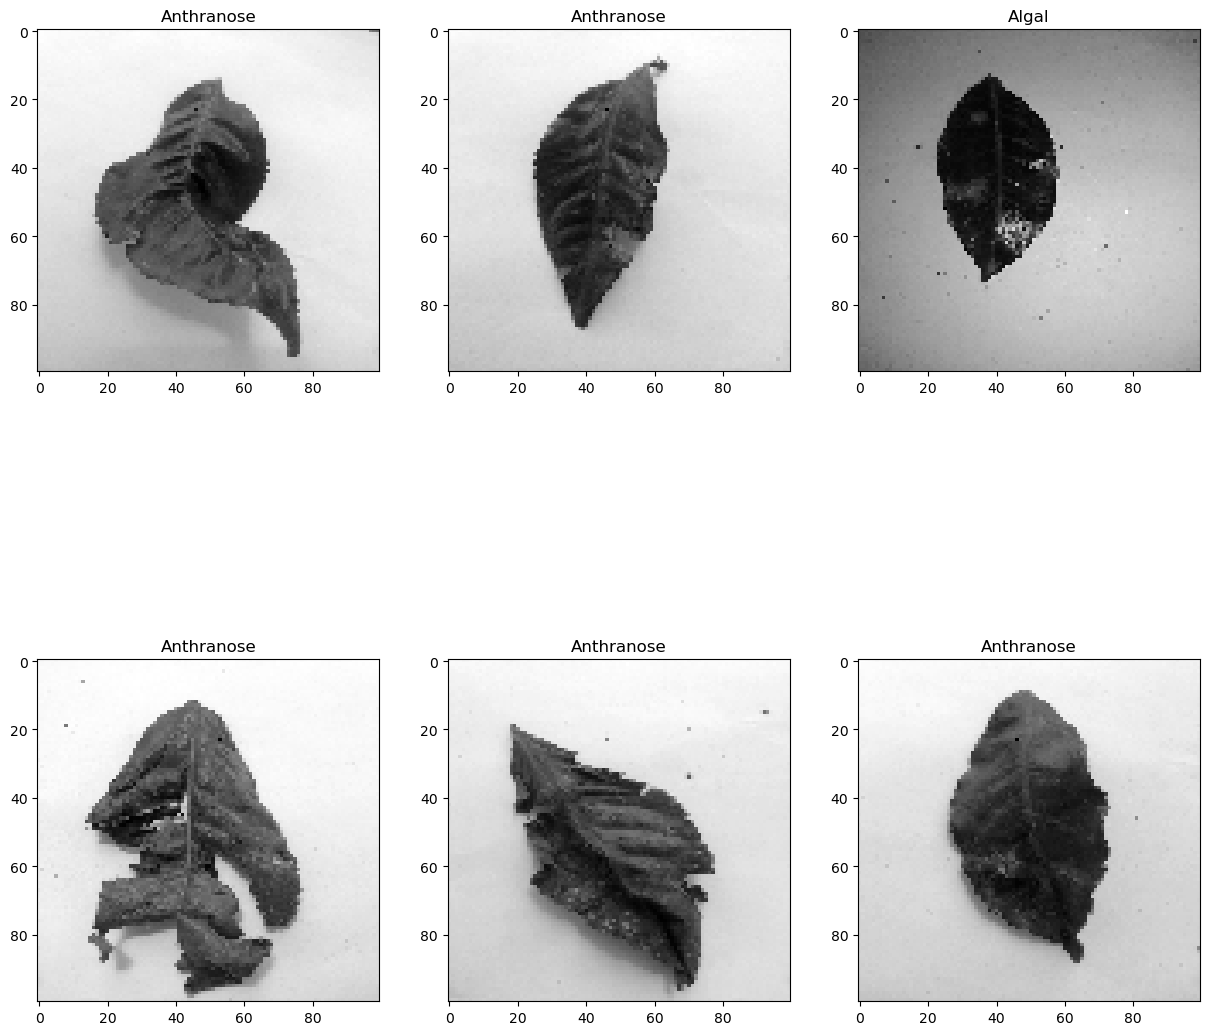

In [22]:
#subplot is used in order to see multiple plots as once 
#WE only going to see 6 images of the leaves as we pass the range from 0 to 6
plt.figure(figsize=(15,15))
for count,i in enumerate(range(0,6),231):
    
    plt.subplot(count)
    if y_train[i]==1:
        plt.title("Algal")
        plt.imshow(X_train[i,:].reshape(100,100),'gray')
        
    elif y_train[i]==0:
        plt.title("Anthranose")
        plt.imshow(X_train[i,:].reshape(100,100),'gray')
plt.show()        

#Here we can see the two different leaf diseases which indicates the normal and pneumonia images , but for demonstration we are only 
# using two labels as 1 and 0 . but further we can also divide the set 

# Scaling

Scaling is necessary as we dont want any biasing towards any values

In [23]:
X_train,X_test = X_train[:,:]/255, X_test[:,:]/255

In [24]:
y_train

array([[0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],

In [25]:
# y_train is a 2D array, for our classification having 1D array is good enough. so we will convert this to now 1D array

In [26]:
#Changing the dimensions of the dataset from columns to rows
y_train = y_train.reshape(-1,)
y_train


array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0.,
       0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1.,
       0., 1., 0., 1., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 1., 1.,
       1., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 1., 1., 1., 0., 0., 0.,
       0., 1., 1., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0.,
       0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 1., 1., 1., 1.,
       0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 1., 1., 0., 0., 0., 1., 0.,
       0., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 0., 1., 0., 0., 1., 0.,
       1., 0., 0., 1., 0., 1., 0., 1., 1., 0., 0., 0., 1., 0., 1., 0., 1.,
       1., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1.,
       0., 0., 1., 1., 0., 0., 0., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0.,
       0., 1., 1., 0., 0., 0., 1., 1., 1., 1., 1., 1., 0., 0., 1., 0., 0.,
       0., 1., 1., 0., 1., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 1.,
       0., 1., 1., 0., 1.

In [27]:
y_test=y_test.reshape(-1,)
y_test

array([0., 1., 1., 0., 1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0., 0.,
       1., 0., 0., 0., 1., 1., 1., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1.,
       1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.])

In [28]:
classes = ["algal","anthranose"]

In [29]:
classes

['algal', 'anthranose']

### Normalizaing the training data is essential as we have images with numbers 0 to 1 . Image has 3 channels (R,g,B) and each value in the channel can range from 0 to 255 . Hence normalizing is imoirtant to make them in range from ) to 1 

In [30]:


X_train=X_train/255
X_train.shape

(575, 10000)

In [31]:
# Reshape is necessary as first dimension being -1 (to automatically infer the size), the second and third dimensions being 100 (the height and width of the images), and the fourth dimension being 1 (since the images are grayscale).

In [32]:
X_train = X_train.reshape(-1, 100, 100, 1)
X_train.shape

(575, 100, 100, 1)

In [33]:
X_test=X_test/255
X_test.shape
X_test = X_test.reshape(-1, 100, 100, 1)
X_test.shape


(64, 100, 100, 1)

In [34]:
y_train.shape

(575,)

### Lets build an Convolutional Neural Network model to train our images

In [35]:
from keras.layers import Conv2D,MaxPooling2D,Flatten,Dense
# Create CNN model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(100, 100, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))




In [36]:
# Compile model with binary crossentropy loss and Adam optimizer
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])



In [37]:
# Print model summary
model.summary()





Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 49, 49, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 47, 47, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 23, 23, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 33856)             0         
                                                                 
 dense (Dense)               (None, 128)               4

In [38]:
# Train model on X_train and y_train

model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
15/15 [==============================] - 16s 584ms/step - loss: 0.6936 - accuracy: 0.4630 - val_loss: 0.6922 - val_accuracy: 0.8522
Epoch 2/10
15/15 [==============================] - 7s 473ms/step - loss: 0.6920 - accuracy: 0.5652 - val_loss: 0.6877 - val_accuracy: 0.5130
Epoch 3/10
15/15 [==============================] - 7s 475ms/step - loss: 0.6857 - accuracy: 0.5196 - val_loss: 0.6847 - val_accuracy: 0.5217
Epoch 4/10
15/15 [==============================] - 7s 468ms/step - loss: 0.6776 - accuracy: 0.5935 - val_loss: 0.6499 - val_accuracy: 0.9304
Epoch 5/10
15/15 [==============================] - 7s 453ms/step - loss: 0.6281 - accuracy: 0.7304 - val_loss: 0.5832 - val_accuracy: 0.8870
Epoch 6/10
15/15 [==============================] - 7s 448ms/step - loss: 0.5357 - accuracy: 0.8130 - val_loss: 0.4405 - val_accuracy: 0.9304
Epoch 7/10
15/15 [==============================] - 6s 374ms/step - loss: 0.4105 - accuracy: 0.8630 - val_loss: 0.3052 - val_accuracy: 0.9478
Epoch

In [39]:
# Be are saving this model as we don't want to rerun all the codes again

In [40]:
model.save('my_model.h5')

In [41]:
from keras.models import load_model

model = load_model('my_model.h5')
model


## Testing the dataset

In [42]:
from keras.models import load_model

# Load the saved model
model = load_model('my_model.h5')

# Assuming you have loaded your test data as X_test and Y_test

# Evaluate the model on the test data
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', loss)
print('Test accuracy:', accuracy)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Print the first 10 predictions
print(y_pred[:10])


Test loss: 0.21410170197486877
Test accuracy: 0.921875
2/2 [==============================] - 1s 111ms/step
[[0.01093945]
 [0.13774128]
 [0.52106375]
 [0.02380408]
 [0.7472186 ]
 [0.9763157 ]
 [0.01680836]
 [0.9328107 ]
 [0.06393015]
 [0.12923197]]


In [43]:
model.evaluate(X_test,np.array(y_test))

2/2 [==============================] - 0s 95ms/step - loss: 0.2141 - accuracy: 0.9219


[0.21410170197486877, 0.921875]

In [44]:
# Select a random sample of 10 images from the test data
sample_indices = np.random.choice(len(X_test), 10, replace=False)
sample_images = X_test[sample_indices]
sample_labels = y_test[sample_indices]



1/1 [==============================] - 1s 1s/step


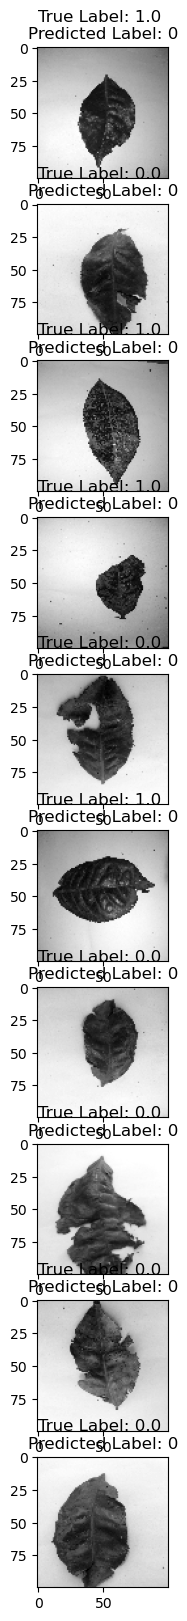

In [45]:

# Predict the labels for the sample images using the loaded model
predicted_labels = model.predict(sample_images)

# Plot the sample images along with the predicted and true labels
fig, axs = plt.subplots(10, 1, figsize=(10, 20))
for i in range(10):
    axs[i].imshow(sample_images[i], cmap='gray')
    axs[i].set_title('True Label: {} \nPredicted Label: {}'.format(sample_labels[i], np.argmax(predicted_labels[i])))
plt.show()

2/2 [==============================] - 0s 95ms/step
0.921875


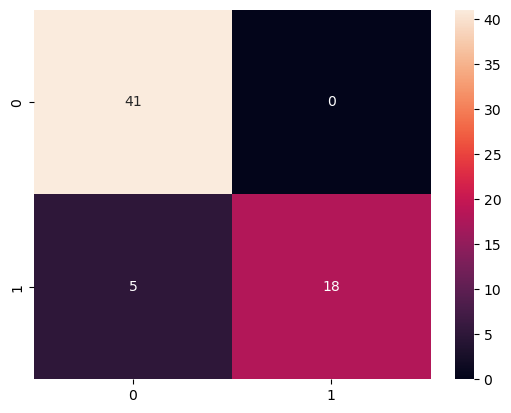

In [46]:
from sklearn.metrics import confusion_matrix
predicted = model.predict(X_test)

y_head_cnn = [0 if i<0.5 else 1 for i in predicted]

# Lets plot a Confusion matrix
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_head_cnn))
cm_cnn = confusion_matrix(y_test,y_head_cnn)
sns.heatmap(cm_cnn, annot=True) ;

## Now using the next 4 folders which has a 3 types of disease on the leaf on the apple and one of them is Healthy diseases.

In [47]:
# here we are getting the dirname and corresponding file name as goind to make a dataset in which we can put these
Apple_scab= []
Black_rot = []
Apple_rust= []
Apple_healthy= []

for dirname, _, filenames in os.walk(r"C:\Users\Acer pc\OneDrive - Manav Rachna Education Institutions\Desktop\dataset\archive\Image Data base\Image Data base\Apple Apple scab"):
    for filename in filenames:
        Apple_scab.append(os.path.join(dirname, filename))
    

for dirname, _, filenames in os.walk(r"C:\Users\Acer pc\OneDrive - Manav Rachna Education Institutions\Desktop\dataset\archive\Image Data base\Image Data base\Apple Black rot"):
    for filename in filenames:
        Black_rot.append(os.path.join(dirname, filename))
        
        
for dirname, _, filenames in os.walk(r"C:\Users\Acer pc\OneDrive - Manav Rachna Education Institutions\Desktop\dataset\archive\Image Data base\Image Data base\Apple Cedar apple rust"):
    for filename in filenames:
        Apple_rust.append(os.path.join(dirname, filename))


for dirname, _, filenames in os.walk(r"C:\Users\Acer pc\OneDrive - Manav Rachna Education Institutions\Desktop\dataset\archive\Image Data base\Image Data base\Apple healthy"):
    for filename in filenames:
        Apple_healthy.append(os.path.join(dirname, filename))
        
# here we are getting the dirname and corresponding file name as goind to make a dataset in which we can put these

In [48]:
Apple_scab

['C:\\Users\\Acer pc\\OneDrive - Manav Rachna Education Institutions\\Desktop\\dataset\\archive\\Image Data base\\Image Data base\\Apple Apple scab\\Apple_Apple_scab1.jpg',
 'C:\\Users\\Acer pc\\OneDrive - Manav Rachna Education Institutions\\Desktop\\dataset\\archive\\Image Data base\\Image Data base\\Apple Apple scab\\Apple_Apple_scab10.jpg',
 'C:\\Users\\Acer pc\\OneDrive - Manav Rachna Education Institutions\\Desktop\\dataset\\archive\\Image Data base\\Image Data base\\Apple Apple scab\\Apple_Apple_scab100.jpg',
 'C:\\Users\\Acer pc\\OneDrive - Manav Rachna Education Institutions\\Desktop\\dataset\\archive\\Image Data base\\Image Data base\\Apple Apple scab\\Apple_Apple_scab1000.jpg',
 'C:\\Users\\Acer pc\\OneDrive - Manav Rachna Education Institutions\\Desktop\\dataset\\archive\\Image Data base\\Image Data base\\Apple Apple scab\\apple_apple_scab1001.jpg',
 'C:\\Users\\Acer pc\\OneDrive - Manav Rachna Education Institutions\\Desktop\\dataset\\archive\\Image Data base\\Image Data b

In [49]:
Black_rot

['C:\\Users\\Acer pc\\OneDrive - Manav Rachna Education Institutions\\Desktop\\dataset\\archive\\Image Data base\\Image Data base\\Apple Black rot\\Apple_Black_rot1.jpg',
 'C:\\Users\\Acer pc\\OneDrive - Manav Rachna Education Institutions\\Desktop\\dataset\\archive\\Image Data base\\Image Data base\\Apple Black rot\\apple_black_rot10.jpg',
 'C:\\Users\\Acer pc\\OneDrive - Manav Rachna Education Institutions\\Desktop\\dataset\\archive\\Image Data base\\Image Data base\\Apple Black rot\\apple_black_rot100.jpg',
 'C:\\Users\\Acer pc\\OneDrive - Manav Rachna Education Institutions\\Desktop\\dataset\\archive\\Image Data base\\Image Data base\\Apple Black rot\\apple_black_rot1000.jpg',
 'C:\\Users\\Acer pc\\OneDrive - Manav Rachna Education Institutions\\Desktop\\dataset\\archive\\Image Data base\\Image Data base\\Apple Black rot\\Apple_Black_rot1001.jpg',
 'C:\\Users\\Acer pc\\OneDrive - Manav Rachna Education Institutions\\Desktop\\dataset\\archive\\Image Data base\\Image Data base\\Apple

In [50]:
Apple_rust

['C:\\Users\\Acer pc\\OneDrive - Manav Rachna Education Institutions\\Desktop\\dataset\\archive\\Image Data base\\Image Data base\\Apple Cedar apple rust\\Apple_Cedar_apple_rust1.jpg',
 'C:\\Users\\Acer pc\\OneDrive - Manav Rachna Education Institutions\\Desktop\\dataset\\archive\\Image Data base\\Image Data base\\Apple Cedar apple rust\\apple_cedar_apple_rust10.jpg',
 'C:\\Users\\Acer pc\\OneDrive - Manav Rachna Education Institutions\\Desktop\\dataset\\archive\\Image Data base\\Image Data base\\Apple Cedar apple rust\\apple_cedar_apple_rust100.jpg',
 'C:\\Users\\Acer pc\\OneDrive - Manav Rachna Education Institutions\\Desktop\\dataset\\archive\\Image Data base\\Image Data base\\Apple Cedar apple rust\\apple_cedar_apple_rust1000.jpg',
 'C:\\Users\\Acer pc\\OneDrive - Manav Rachna Education Institutions\\Desktop\\dataset\\archive\\Image Data base\\Image Data base\\Apple Cedar apple rust\\apple_cedar_apple_rust1001.jpg',
 'C:\\Users\\Acer pc\\OneDrive - Manav Rachna Education Institutio

In [51]:
Apple_healthy

['C:\\Users\\Acer pc\\OneDrive - Manav Rachna Education Institutions\\Desktop\\dataset\\archive\\Image Data base\\Image Data base\\Apple healthy\\Apple_healthy1.jpg',
 'C:\\Users\\Acer pc\\OneDrive - Manav Rachna Education Institutions\\Desktop\\dataset\\archive\\Image Data base\\Image Data base\\Apple healthy\\Apple_healthy10.jpg',
 'C:\\Users\\Acer pc\\OneDrive - Manav Rachna Education Institutions\\Desktop\\dataset\\archive\\Image Data base\\Image Data base\\Apple healthy\\Apple_healthy100.jpg',
 'C:\\Users\\Acer pc\\OneDrive - Manav Rachna Education Institutions\\Desktop\\dataset\\archive\\Image Data base\\Image Data base\\Apple healthy\\Apple_healthy1000.jpg',
 'C:\\Users\\Acer pc\\OneDrive - Manav Rachna Education Institutions\\Desktop\\dataset\\archive\\Image Data base\\Image Data base\\Apple healthy\\Apple_healthy1000.jpg_Flip_Horizontally_and_Vertically.jpg',
 'C:\\Users\\Acer pc\\OneDrive - Manav Rachna Education Institutions\\Desktop\\dataset\\archive\\Image Data base\\Image

# Data Preprocessing

In [52]:
# Adding Labels

In [53]:
# here Apple_healthy is the array of 3948 rows and 1 column containg 0s.
label_Apple_healthy= np.full((3948,1),0)

# here Apple_scab is the array of 6048 rows and 1 column containg 1s.
label_Apple_scab= np.full((6048,1),1)

# here Apple_healthy is the array of 5964 rows and 1 column containg 2s.
label_Black_rot= np.full((5964,1),2)

# here Apple_scab is the array of 2640 rows and 1 column containg 3s.
label_Apple_rust= np.full((2640,1),3)

In [54]:
label1 = list(np.concatenate((label_Apple_healthy,label_Apple_scab,label_Black_rot,label_Apple_rust),axis = 0));
len(label1)

18600

In [55]:
paths1 = np.concatenate((Apple_healthy[0:3948], Apple_scab[0:6048], Black_rot[0:5964], Apple_rust[0:2640]), axis=0)
paths1

array(['C:\\Users\\Acer pc\\OneDrive - Manav Rachna Education Institutions\\Desktop\\dataset\\archive\\Image Data base\\Image Data base\\Apple healthy\\Apple_healthy1.jpg',
       'C:\\Users\\Acer pc\\OneDrive - Manav Rachna Education Institutions\\Desktop\\dataset\\archive\\Image Data base\\Image Data base\\Apple healthy\\Apple_healthy10.jpg',
       'C:\\Users\\Acer pc\\OneDrive - Manav Rachna Education Institutions\\Desktop\\dataset\\archive\\Image Data base\\Image Data base\\Apple healthy\\Apple_healthy100.jpg',
       ...,
       'C:\\Users\\Acer pc\\OneDrive - Manav Rachna Education Institutions\\Desktop\\dataset\\archive\\Image Data base\\Image Data base\\Apple Cedar apple rust\\apple_cedar_apple_rust997.jpg',
       'C:\\Users\\Acer pc\\OneDrive - Manav Rachna Education Institutions\\Desktop\\dataset\\archive\\Image Data base\\Image Data base\\Apple Cedar apple rust\\apple_cedar_apple_rust998.jpg',
       'C:\\Users\\Acer pc\\OneDrive - Manav Rachna Education Institutions\\Desk

In [56]:
#this d is actually a dataset but without the dataframe it's just a normal table with their paths and it labels
d1 = {'paths': paths1, 'label': label1
    }
df1 = pd.DataFrame(data=d1)
df1

,paths,label
0,C:\Users\Acer pc\OneDrive - Manav Rachna Educa...,[0]
1,C:\Users\Acer pc\OneDrive - Manav Rachna Educa...,[0]
2,C:\Users\Acer pc\OneDrive - Manav Rachna Educa...,[0]
3,C:\Users\Acer pc\OneDrive - Manav Rachna Educa...,[0]
4,C:\Users\Acer pc\OneDrive - Manav Rachna Educa...,[0]
...,...,...
18595,C:\Users\Acer pc\OneDrive - Manav Rachna Educa...,[3]
18596,C:\Users\Acer pc\OneDrive - Manav Rachna Educa...,[3]
18597,C:\Users\Acer pc\OneDrive - Manav Rachna Educa...,[3]
18598,C:\Users\Acer pc\OneDrive - Manav Rachna Educa...,[3]


[0]
Apple_scab


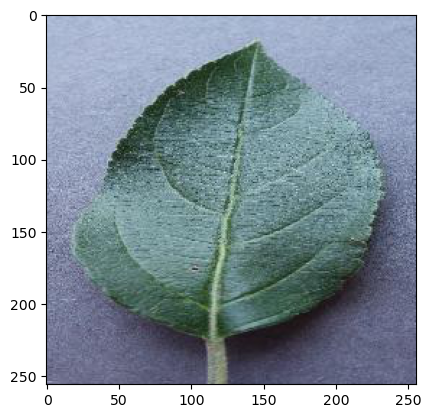

In [57]:
class2=["Apple_healthy","Apple_scab","Black_rot","Apple_rust"]
img = plt.imread(paths1[1])
print(label1[1])
print(class2[1])
plt.imshow(img)
plt.show()

[0]
Apple_healthy


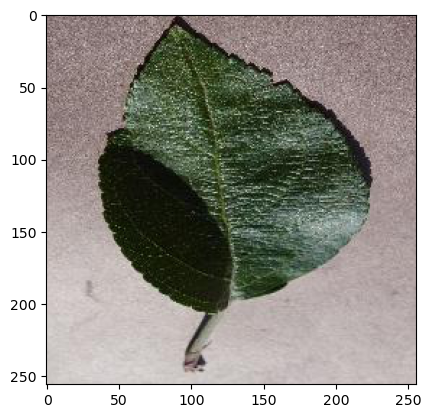

[0]
Apple_healthy


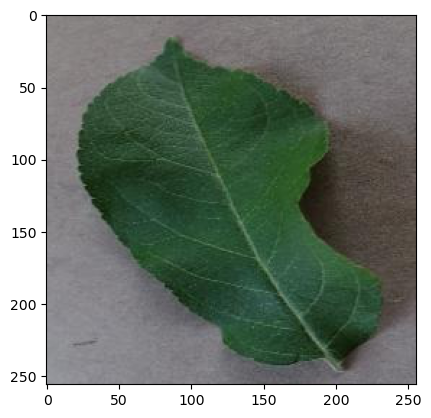

[1]
Apple_scab


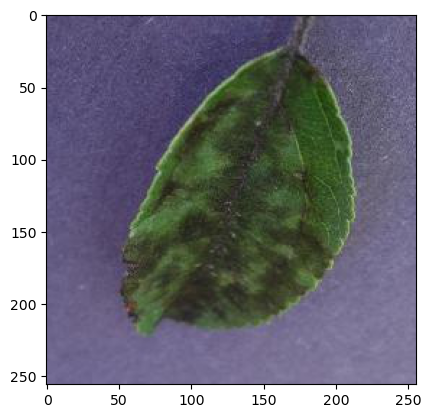

[1]
Apple_scab


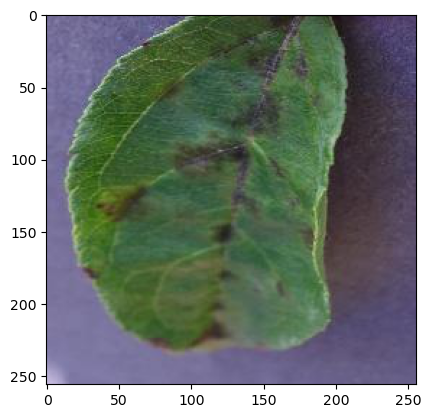

[2]
Black_rot


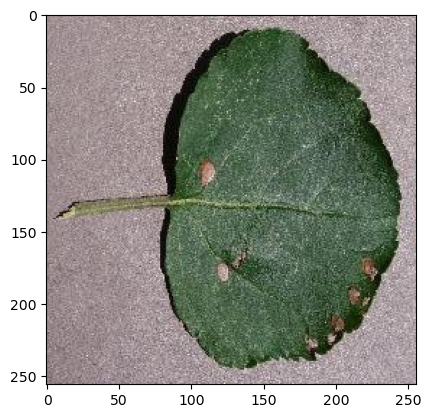

[2]
Black_rot


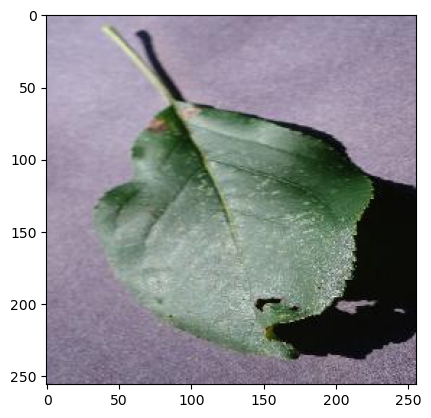

[3]
Apple_rust


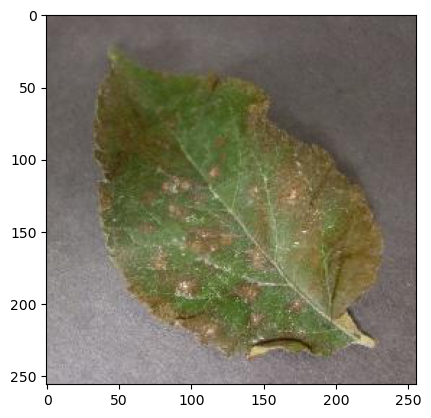

In [58]:
class2=["Apple_healthy","Apple_scab","Black_rot","Apple_rust"]
for i in range(0,18600,3000):
    img = plt.imread(paths1[i])
    print(label1[i])
    var=label1[i]
    print(class2[int(var)])
    plt.imshow(img)
    plt.show()

In [59]:
df1.shape

(18600, 2)

In [60]:
df1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18600 entries, 0 to 18599
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   paths   18600 non-null  object
 1   label   18600 non-null  object
dtypes: object(2)
memory usage: 290.8+ KB


Now the dataframe is made we can processed further but we need to resize the images as they all are of different dimentions actually we are using an enumerator to update the values of count and ele in order to vertically stack them and able to resize them . As resize is essential as every image has different dimensions so , we are using cv.resize to make them into 100*100 size

In [61]:
X = np.zeros((1,100*100),np.uint8)#this uint 8 is defining in 8 bit
y = np.zeros((1,1),np.uint8)

'''The for loop iterates over the rows of the first column (df.iloc[:,0]) of
a pandas DataFrame (df), with the enumerate function used to keep track 
of the index (count) and value (ele) of each row.'''

#we also vstack the y onto the dataset Within the loop, the code reads in an image file s
for count,ele in enumerate (df1.iloc[:,0],0): 
    y_temp = df1.iloc[count,1]
    y = np.vstack((y,y_temp))
    X_temp = cv2.imread(ele,cv2.IMREAD_GRAYSCALE) 
    X_temp = cv2.resize(X_temp,(100,100)).reshape(1,100*100)
    X = np.vstack((X,X_temp))
    if count/10 >= 99.9:
        print("Done")
X = X[1:,:]
y = y[1:,:]

Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done


Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done


Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done


Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done


Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done


Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done


Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done


Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done


Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done


Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done


Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done


In [62]:
#now we have X and y and X is the updated array after the vertical stack , vertical stack and resize in order to maintian norma;lization among the dataset.
X

array([[120, 122, 131, ..., 188, 191, 194],
       [181, 191, 190, ..., 103, 100, 101],
       [240, 238, 238, ..., 151, 174, 170],
       ...,
       [153, 152, 150, ...,  66,  72,  65],
       [ 65,  72,  66, ..., 150, 152, 153],
       [153, 154, 155, ..., 118, 120, 115]], dtype=uint8)

In [63]:
y

array([[0],
       [0],
       [0],
       ...,
       [3],
       [3],
       [3]])

# Test and train split
## Spliting the dataset into two parts which is training set and testing set , for our case the training set is 90 and testing set is 10 in ratio.

In [64]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [65]:
X_train

array([[137, 156, 154, ..., 178, 192, 183],
       [138, 135, 156, ..., 165, 149, 150],
       [148, 128, 148, ..., 165, 173, 178],
       ...,
       [167, 173, 165, ..., 148, 149, 146],
       [115, 115, 122, ..., 153, 151, 149],
       [170, 171, 171, ..., 116, 120, 117]], dtype=uint8)

In [66]:
y_train

array([[2],
       [2],
       [2],
       ...,
       [1],
       [0],
       [2]])

In [67]:
X_test

array([[166, 122, 119, ..., 186, 177, 175],
       [101, 102, 100, ..., 130, 137, 134],
       [143, 149, 143, ..., 159, 150, 160],
       ...,
       [122, 123, 119, ...,  20,  21,  30],
       [134, 134, 142, ..., 136, 130, 141],
       [187, 189, 190, ...,  82,  95,  96]], dtype=uint8)

In [68]:
y_test

array([[2],
       [0],
       [2],
       ...,
       [1],
       [2],
       [0]])

In [69]:
X_train.shape

(16740, 10000)

In [70]:
X_test.shape

(1860, 10000)

In [71]:
y_test.shape

(1860, 1)

In [72]:
y_train.shape

(16740, 1)

# Visulaization

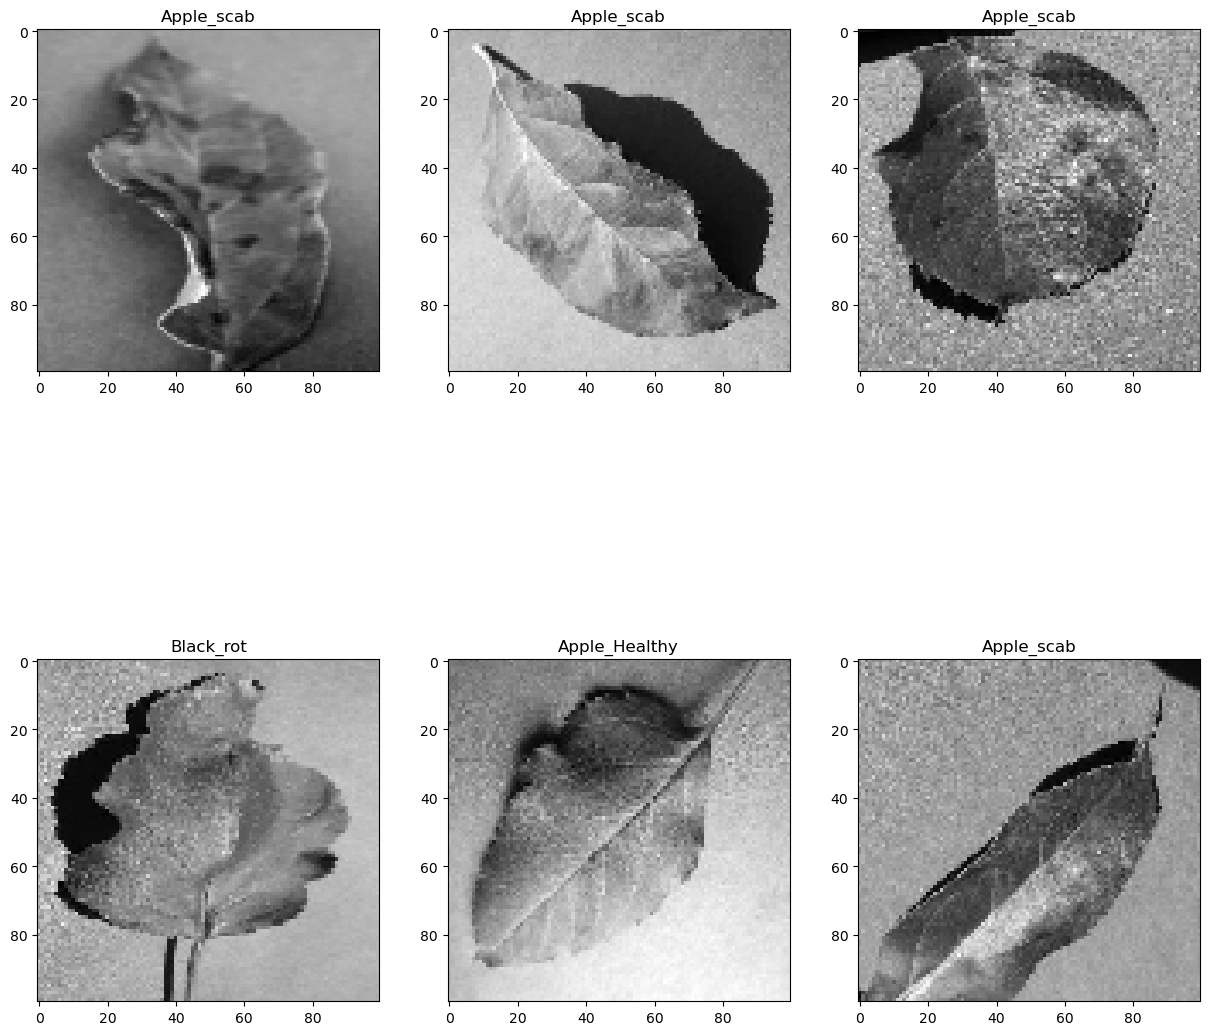

In [73]:
#subplot is used in order to see multiple plots as once 
#WE only going to see 6 images of the leaves as we pass the range from 0 to 6
plt.figure(figsize=(15,15))
for count,i in enumerate(range(3000,3006),231):
    
    plt.subplot(count)
    if y_train[i]==0:
        plt.title("Apple_Healthy")
        plt.imshow(X_train[i,:].reshape(100,100),'gray')
        
    elif y_train[i]==1:
        plt.title("Apple_scab")
        plt.imshow(X_train[i,:].reshape(100,100),'gray')
        
    elif y_train[i]==2:
        plt.title("Black_rot")
        plt.imshow(X_train[i,:].reshape(100,100),'gray')
        
    elif y_train[i]==3:
        plt.title("Apple_rust")
        plt.imshow(X_train[i,:].reshape(100,100),'gray')
plt.show()        



# Scaling
Scaling is necessary as we dont want any biasing towards any values

In [74]:
X_train,X_test = X_train[:,:]/255, X_test[:,:]/255

In [75]:
X_train


array([[0.5372549 , 0.61176471, 0.60392157, ..., 0.69803922, 0.75294118,
        0.71764706],
       [0.54117647, 0.52941176, 0.61176471, ..., 0.64705882, 0.58431373,
        0.58823529],
       [0.58039216, 0.50196078, 0.58039216, ..., 0.64705882, 0.67843137,
        0.69803922],
       ...,
       [0.65490196, 0.67843137, 0.64705882, ..., 0.58039216, 0.58431373,
        0.57254902],
       [0.45098039, 0.45098039, 0.47843137, ..., 0.6       , 0.59215686,
        0.58431373],
       [0.66666667, 0.67058824, 0.67058824, ..., 0.45490196, 0.47058824,
        0.45882353]])

In [76]:
y_train

array([[2],
       [2],
       [2],
       ...,
       [1],
       [0],
       [2]])

In [77]:
#Changing the dimensions of the dataset from columns to rows
y_train = y_train.reshape(-1,)
y_train


array([2, 2, 2, ..., 1, 0, 2])

In [78]:
y_test=y_test.reshape(-1,)
y_test


array([2, 0, 2, ..., 1, 2, 0])

## Normalizaing the training data is essential as we have images with numbers 0 to 3 . Image has 3 channels (R,g,B) and each value in the channel can range from 0 to 255 . Hence normalizing is imoirtant to make them in range from ) to 3




In [79]:
X_train=X_train/255
X_train.shape


(16740, 10000)

In [80]:

X_train = X_train.reshape(-1, 100, 100, 1)
X_train.shape



(16740, 100, 100, 1)

In [81]:
X_test=X_test/255
X_test.shape


(1860, 10000)

In [82]:
X_test = X_test.reshape(-1, 100, 100, 1)
X_test.shape

(1860, 100, 100, 1)

Lets build an Convolutional Neural Network model to train our images
from keras.layers import Conv2D,MaxPooling2D,Flatten,Dense


In [83]:
# Define the CNN model
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(100, 100, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(4, activation='softmax'))

In [84]:
from keras import optimizers

sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])


C:\Users\Acer pc\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [85]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 98, 98, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 49, 49, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 47, 47, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 23, 23, 64)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 33856)             0         
                                                                 
 dense_2 (Dense)             (None, 128)              

In [1]:
# Train model on X_train and y_train

model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

NameError: name 'model' is not defined

In [ ]:
pip install tflearn